# Filtern und Felder kombinieren

**Inhalt:** Die Nadel im Heuhaufen finden

**Nötige Skills:** Erste Schritte mit Pandas

**Lernziele:**
- Einträge im Datenset finden, basierend auf Kriterien
- Nan kennenlernen
- Neue Datenfelder generieren
- Plotting Level 1

# Das Beispiel

Die besten NBA-Basketball-Spieler aller Zeiten.

Quelle/Beschreibung: https://stats.nba.com/alltime-leaders/

**Laden Sie das Datenfile von hier herunter: **

und speichern Sie es an einem geeigneten Ort

(zum Beispiel in einem Unterordner `dataprojects/nba-players`)

## Vorbereitung

In [1]:
import pandas as pd

In [2]:
%matplotlib inline

## Datenfile laden

Wo ist die Datei?

In [3]:
path = 'dataprojects/nba-players/alltime.xlsx'

Für den Import von Excel-Dateien nutzen wir die Funktion `read_excel()`

In [4]:
df = pd.read_excel(path)

## Überblick verschaffen

Wie immer zu Beginn, checken wir die Struktur und Länge des Datensets ab

- erste drei Reihen

In [5]:
df.head(3)

,#,Player,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,eFG%,TS%
0,1,Kareem Abdul-Jabbar,1560,57446,38387,15837,28307,55.9,1,18,...,72.1,2975,9394,17440,5660,1160,3189,2527,55.9,59.2
1,2,Karl Malone,1476,54852,36928,13528,26210,51.6,85,310,...,74.2,3562,11406,14968,5248,2085,1145,4524,51.8,57.7
2,3,Kobe Bryant,1346,48643,33643,11719,26200,44.7,1827,5546,...,83.7,1499,5548,7047,6306,1944,640,4010,48.2,55.0


- Anzahl der Zeilen und Spalten

In [6]:
df.shape

(1238, 23)

- Spaltennamen und Datentypen

In [7]:
df.dtypes

#           int64
Player     object
GP          int64
MIN         int64
PTS         int64
FGM         int64
FGA         int64
FG%       float64
3PM        object
3PA        object
3P%        object
FTM         int64
FTA         int64
FT%       float64
OREB       object
DREB       object
REB         int64
AST         int64
STL        object
BLK        object
TOV        object
eFG%      float64
TS%       float64
dtype: object

## Wer ist der beste Basketballspieler aller Zeiten?

Diese Leitfrage wird uns durch dieses Notebook begleiten.

Für die NBA ist offensichtlich klar: Es ist **Kareem Abdul-Jabbar**.

Das zeigt sich, wenn wir nochmals die obersten drei Zeilen anzeigen:

In [8]:
df.head(3)

,#,Player,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,eFG%,TS%
0,1,Kareem Abdul-Jabbar,1560,57446,38387,15837,28307,55.9,1,18,...,72.1,2975,9394,17440,5660,1160,3189,2527,55.9,59.2
1,2,Karl Malone,1476,54852,36928,13528,26210,51.6,85,310,...,74.2,3562,11406,14968,5248,2085,1145,4524,51.8,57.7
2,3,Kobe Bryant,1346,48643,33643,11719,26200,44.7,1827,5546,...,83.7,1499,5548,7047,6306,1944,640,4010,48.2,55.0


Doch: basierend auf welcher Metrik kommt die NBA zu diesem Schluss?
    
Gibt es auch noch andere Varianten, diese Rangliste zu erstellen?

Und vor allem: Wo zur Hölle ist **Michael Jordan**??

## Einträge filtern

### Die erste Suche

Die Syntax, mit dem man in Pandas einzelne Einträge aus dem Datenset herausfiltert, funktioniert, wie nicht anders zu erwarten, mit eckigen Klammern.

In [9]:
df[df['Player'] == 'Michael Jordan']

,#,Player,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,eFG%,TS%
3,4,Michael Jordan,1072,41010,32292,12192,24537,49.7,581,1778,...,83.5,1668,5004,6672,5633,2514,893,2924,50.9,56.9


Michael Jordan steht also auf Rang vier der ewigen Bestenliste der NBA (der Rang ist in der ersten Spalte mit dem Titel "`#`" angegeben)

Schauen wir uns diesen Code etwas genauer an. Zuerst den inneren Teil:

In [ ]:
df['Player'] == 'Michael Jordan'

Was ist das für ein Datentyp?

In [ ]:
type(df['Player'] == 'Michael Jordan')

Speichern wir nun diese Serie in einer separaten Variable ab ...

In [ ]:
jordan = df['Player'] == 'Michael Jordan'

... und setzen wir diese Variable nochmals in den äusseren Ausdruck ein:

In [ ]:
df[jordan]

Fassen wir zusammen:
- Wir picken uns zuerst eine Serie heraus: `df['Player']`
- Dann testen wir jedes Element der Serie mit einem Vergleichsoperator `df['Player'] == 'Michael Jordan'`
- Es entsteht dabei eine neue Serie mit True/False-Einträgen (boolean)
- Nun "filtern" wir das dataframe mit dieser True/False-Serie: `df[..`(False-False-True-False)`...]`

### Filtern mit Vergleichsoperatoren

Es gibt diverse Vergleichsoperatoren:
- `==` gleich
- `<` kleiner als
- `<=` kleiner gleich
- `>` grösser als
- `>=` grösser gleich
- `!=` nicht gleich

**Beispiel:** Alle Spieler, die mehr als 1500 Spiele absolviert haben

In [10]:
df[df['GP'] > 1500]

,#,Player,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,eFG%,TS%
0,1,Kareem Abdul-Jabbar,1560,57446,38387,15837,28307,55.9,1,18,...,72.1,2975,9394,17440,5660,1160,3189,2527,55.9,59.2
26,27,Robert Parish,1611,45704,23334,9614,17914,53.7,0,6,...,72.1,4598,10117,14715,2180,1219,2361,3183,53.7,57.1
44,45,John Stockton,1504,47766,19711,7039,13658,51.5,845,2202,...,82.6,966,3085,4051,15806,3265,315,4244,54.6,60.8


**Beispiel:**: Alle Spieler, die mehr als 30'000 Punkte gesammelt haben

In [11]:
df[df['PTS'] > 30000]

,#,Player,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,eFG%,TS%
0,1,Kareem Abdul-Jabbar,1560,57446,38387,15837,28307,55.9,1,18,...,72.1,2975,9394,17440,5660,1160,3189,2527,55.9,59.2
1,2,Karl Malone,1476,54852,36928,13528,26210,51.6,85,310,...,74.2,3562,11406,14968,5248,2085,1145,4524,51.8,57.7
2,3,Kobe Bryant,1346,48643,33643,11719,26200,44.7,1827,5546,...,83.7,1499,5548,7047,6306,1944,640,4010,48.2,55.0
3,4,Michael Jordan,1072,41010,32292,12192,24537,49.7,581,1778,...,83.5,1668,5004,6672,5633,2514,893,2924,50.9,56.9
4,5,Wilt Chamberlain,1045,47859,31419,12681,23497,54.0,-,-,...,51.1,-,-,23924,4643,-,-,-,54.0,54.7
5,6,Dirk Nowitzki,1471,50572,31187,11034,23358,47.2,1918,5005,...,87.9,1463,9868,11331,3616,1201,1263,2476,51.3,57.8
6,7,LeBron James,1143,44297,31038,11280,22383,50.4,1616,4701,...,73.9,1386,7029,8415,8208,1865,888,3966,54.0,58.6


(Hier wäre also das Kriterium, auf dem die NBA-Rangliste basiert!)

### Logische Operatoren

Und es gibt diverse logische Operatoren:
- `&` logisches UND
- `|` logisches ODER
- `~` logisches NICHT

Beim kombinieren, beachte die Klammern!

**Beispiel**: Alle Spieler, die entweder Michael Jordan heissen oder mehr als 1500 Spiele absolviert haben

In [12]:
df[(df['Player'] == 'Michael Jordan') | (df['GP'] > 1500)]

,#,Player,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,eFG%,TS%
0,1,Kareem Abdul-Jabbar,1560,57446,38387,15837,28307,55.9,1,18,...,72.1,2975,9394,17440,5660,1160,3189,2527,55.9,59.2
3,4,Michael Jordan,1072,41010,32292,12192,24537,49.7,581,1778,...,83.5,1668,5004,6672,5633,2514,893,2924,50.9,56.9
26,27,Robert Parish,1611,45704,23334,9614,17914,53.7,0,6,...,72.1,4598,10117,14715,2180,1219,2361,3183,53.7,57.1
44,45,John Stockton,1504,47766,19711,7039,13658,51.5,845,2202,...,82.6,966,3085,4051,15806,3265,315,4244,54.6,60.8


**Beispiel**: Alle Spieler, die nicht Michael Jordan heissen und nicht weniger als 30'000 Punkte gesammelt haben

In [13]:
df[~(df['Player'] == 'Michael Jordan') & ~(df['PTS'] < 30000)]

,#,Player,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,eFG%,TS%
0,1,Kareem Abdul-Jabbar,1560,57446,38387,15837,28307,55.9,1,18,...,72.1,2975,9394,17440,5660,1160,3189,2527,55.9,59.2
1,2,Karl Malone,1476,54852,36928,13528,26210,51.6,85,310,...,74.2,3562,11406,14968,5248,2085,1145,4524,51.8,57.7
2,3,Kobe Bryant,1346,48643,33643,11719,26200,44.7,1827,5546,...,83.7,1499,5548,7047,6306,1944,640,4010,48.2,55.0
4,5,Wilt Chamberlain,1045,47859,31419,12681,23497,54.0,-,-,...,51.1,-,-,23924,4643,-,-,-,54.0,54.7
5,6,Dirk Nowitzki,1471,50572,31187,11034,23358,47.2,1918,5005,...,87.9,1463,9868,11331,3616,1201,1263,2476,51.3,57.8
6,7,LeBron James,1143,44297,31038,11280,22383,50.4,1616,4701,...,73.9,1386,7029,8415,8208,1865,888,3966,54.0,58.6


**Quiz**: Finden Sie alle Spieler mit einer Wurfquote (FG%) von über 60 Prozent

In [14]:
#Antwort
df[df["FG%"] > 60]

,#,Player,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,eFG%,TS%
583,584,DeAndre Jordan,750,21044,7078,2860,4252,67.3,1,11,...,44.6,2435,5553,7988,557,448,1277,982,67.3,63.3
1122,1123,Brandan Wright,428,6949,2976,1271,2095,60.7,0,12,...,67.4,586,974,1560,199,198,425,202,60.7,62.6


**Quiz:** Finden Sie alle Spieler, die mehr als 10'000 Rebounds (REB) und mehr als 5000 Assists (AST) gesammelt haben

In [17]:
#Antwort
df[(df["REB"] > 10000) & (df["AST"] > 5000)]

,#,Player,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,eFG%,TS%
0,1,Kareem Abdul-Jabbar,1560,57446,38387,15837,28307,55.9,1,18,...,72.1,2975,9394,17440,5660,1160,3189,2527,55.9,59.2
1,2,Karl Malone,1476,54852,36928,13528,26210,51.6,85,310,...,74.2,3562,11406,14968,5248,2085,1145,4524,51.8,57.7
16,17,Kevin Garnett,1462,50412,26071,10505,21142,49.7,174,632,...,78.9,3209,11453,14662,5445,1859,2037,3179,50.1,54.6


**Quiz:** Finden Sie alle Spieler, die weniger als 1000 Turnovers (Ballverluste, TOV) auf ihrem Konto haben und eine Dreipunktewurfquote (3P%) über 50 Prozent.

In [26]:
#Antwort
#df[(float(df["TOV"]) < 1000) & (float(df["3P%"]) > 50)]
df_cleaned = df["3P%"].replace("-",0)
df_cleaned.value_counts()

0.0     322
38.4     13
16.7     12
34.9     11
33.2     11
25.0     11
33.3     10
35.5     10
20.0      9
32.7      9
33.5      9
36.1      9
36.6      8
14.3      8
35.7      8
33.8      8
37.3      8
11.1      7
34.3      7
35.6      7
34.1      7
37.6      7
37.0      7
34.0      7
33.6      7
35.4      7
33.7      7
31.8      7
37.8      6
34.4      6
       ... 
13.8      1
40.4      1
25.2      1
9.4       1
3.4       1
41.7      1
23.6      1
18.1      1
25.6      1
21.3      1
12.1      1
25.1      1
23.2      1
45.4      1
32.3      1
14.8      1
13.4      1
2.4       1
11.6      1
22.2      1
29.6      1
40.7      1
22.3      1
30.8      1
38.5      1
42.5      1
11.3      1
40.5      1
41.5      1
18.4      1
Name: 3P%, Length: 294, dtype: int64

**Oops!**

Was ging hier schief??

Pandas sagt: `TypeError`. Was kann das heissen?

Checken wir nochmals die Datentypen.

In [ ]:
df.dtypes

Offensichtlich wurden einige Spalten als `object` und nicht als `int64` oder `float64` erfasst.

Zum Beispiel eben die Spalte TOV. Schauen wir sie nochmals genauer an.

In [ ]:
df['TOV']

Einige Spieler haben bei TOV keine Zahlen drin, sondern fehlende Werte: -

Wir müssen das korrigieren.

## Introducing: nan

Pandas hat für fehlende Werte kein Sonderzeichen, sondern einen speziellen Datentyp: nan (not a number)

Wir müssen irgendwie dafür sorgen, dass die Bindestriche in dieser Tabelle durch nan's ersetzt werden.

Nur so werden wir die Kalkulationen für die betreffenden Felder ausführen können.

Es gibt diverse Tricks, um Daten zu putzen und fehlende Werte als nan zu klassifizieren.

Der einfachste: Die Daten einfach nochmal neu öffnen, mit einer speziellen Zusatzangabe: `na_values`

In [27]:
df = pd.read_excel(path, na_values='-')

Et voilà: Hier sind unsere Datentypen

In [28]:
df.dtypes

#           int64
Player     object
GP          int64
MIN         int64
PTS         int64
FGM         int64
FGA         int64
FG%       float64
3PM       float64
3PA       float64
3P%       float64
FTM         int64
FTA         int64
FT%       float64
OREB      float64
DREB      float64
REB         int64
AST         int64
STL       float64
BLK       float64
TOV       float64
eFG%      float64
TS%       float64
dtype: object

Und hier unsere Spieler mit weniger als 1000 Turnovers und Dreipunktewurfquote über 50 Prozent.

In [29]:
df[(df['TOV'] < 1000) & (df['3P%'] > 50)]

,#,Player,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,eFG%,TS%
111,112,Pete Maravich,658,24316,15948,6187,14025,44.1,10.0,15.0,...,82.0,426.0,1421.0,2747,3563,587.0,108.0,530.0,44.1,50.0


Wow, **Pete Maravich** ist der einzige Spieler, der das geschafft hat! Er ist der beste Spieler der NBA aller Zeiten!!

Hier ein Video von Pete Maravich: https://www.youtube.com/watch?v=cL74uXq5l2o

... allerdings hat Pete Maravich auch nur in 658 Spielen gespielt, deutlich weniger als Kareem Abdul-Jabbar mit seinen 1560 Spielen.

Wie wäre es also mit einem neuen Kriterium: Ballverluste pro Spiel? Wer schneidet hier besser ab, Maravich oder Abdul-Jabbar?

## Neue Spalten erstellen

Bislang haben wir unsere Vergleiche mit bestehenden Spalten angestellt. Nun müssen wir eine neue Spalte erstellen.

Wir nennen sie "TOV%" und sagen Pandas, dafür die Anzahl der Ballverluste durch die Anzahl der Spiele zu dividieren.

In [32]:
df['TOV%'] = df['TOV'] / df['GP'] # Setze oder ersetze eine neue Spalte

Schaun wir mal, wer nun besser abschneidet: Pete Maravich oder Kareem Abdul-Jabbar?

In [33]:
df[(df['Player'] == 'Pete Maravich') | (df['Player'] == 'Kareem Abdul-Jabbar')]

,#,Player,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,OREB,DREB,REB,AST,STL,BLK,TOV,eFG%,TS%,TOV%
0,1,Kareem Abdul-Jabbar,1560,57446,38387,15837,28307,55.9,1.0,18.0,...,2975.0,9394.0,17440,5660,1160.0,3189.0,2527.0,55.9,59.2,1.619872
111,112,Pete Maravich,658,24316,15948,6187,14025,44.1,10.0,15.0,...,426.0,1421.0,2747,3563,587.0,108.0,530.0,44.1,50.0,0.805471


Wir können die üblichen mathematischen Operatoren verwenden, um auf diese Weise Spalten zu erzeugen:
- `+`, `-`, `*`, `/`, `**`, `%`, `//` (die komplette Liste der Operatoren: https://www.tutorialspoint.com/python/python_basic_operators.htm)

**Quiz:** Erstellen Sie eine neue Spalte ("TOT") mit dem Total der Rebounds, Assists, Steals und Blocks, die ein Spieler in seiner Karriere gesammelt hat.

In [34]:
#Antwort
df["TOT"] = df["REB"] + df["AST"] + df["STL"] + df["BLK"]

**Quiz:** Welche zehn Spieler haben die grössten Tot-Werte aller Zeiten?

In [40]:
#Antwort
df.sort_values("TOT", ascending=False).head(10)

,#,Player,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,DREB,REB,AST,STL,BLK,TOV,eFG%,TS%,TOV%,TOT
0,1,Kareem Abdul-Jabbar,1560,57446,38387,15837,28307,55.9,1.0,18.0,...,9394.0,17440,5660,1160.0,3189.0,2527.0,55.9,59.2,1.619872,27449.0
16,17,Kevin Garnett,1462,50412,26071,10505,21142,49.7,174.0,632.0,...,11453.0,14662,5445,1859.0,2037.0,3179.0,50.1,54.6,2.174419,24003.0
80,81,Jason Kidd,1391,50116,17529,6219,15557,40.0,1988.0,5701.0,...,6957.0,8725,12091,2684.0,450.0,4003.0,46.4,50.7,2.877786,23950.0
1,2,Karl Malone,1476,54852,36928,13528,26210,51.6,85.0,310.0,...,11406.0,14968,5248,2085.0,1145.0,4524.0,51.8,57.7,3.065041,23446.0
44,45,John Stockton,1504,47766,19711,7039,13658,51.5,845.0,2202.0,...,3085.0,4051,15806,3265.0,315.0,4244.0,54.6,60.8,2.821809,23437.0
13,14,Tim Duncan,1392,47367,26496,10285,20334,50.6,30.0,168.0,...,11232.0,15091,4225,1025.0,3020.0,3381.0,50.7,55.1,2.428879,23361.0
10,11,Hakeem Olajuwon,1238,44218,26946,10749,20991,51.2,25.0,124.0,...,9714.0,13748,3058,2162.0,3830.0,3667.0,51.3,55.3,2.962036,22798.0
9,10,Elvin Hayes,1303,50000,27313,10976,24272,45.2,5.0,34.0,...,6973.0,16279,2398,864.0,1771.0,1358.0,45.2,49.1,1.042210,21312.0
8,9,Moses Malone,1329,45071,27409,9435,19225,49.1,8.0,80.0,...,9481.0,16212,1796,1089.0,1733.0,3804.0,49.1,56.9,2.862302,20830.0
26,27,Robert Parish,1611,45704,23334,9614,17914,53.7,0.0,6.0,...,10117.0,14715,2180,1219.0,2361.0,3183.0,53.7,57.1,1.975791,20475.0


## Sortieren nach bestimmten Kriterien

Wir haben die Funktion `sort_values()` bereits kennengelernt beim Sortieren von einfachen Serien.

Nun benutzen wir sie, um ganze Dataframes zu sortieren. Dabei müssen wir jeweils angeben, nach welchen Spalten wir sortieren wollen und in welcher Richtung wir die Einträge anzeigen lassen.

**Beispiel:** Sortieren nach der Anzahl Ballverluste pro Spiel, mit der tiefsten Quote zuerst (wir zeigen nur die ersten 10 Einträge an)

In [ ]:
df.sort_values('TOV%').head(10)

**Beispiel:** Sortieren nach der Wurfquote pro Spiel, mit der höchsten Quote zuerst (wir zeigen nur die ersten 10 Einträge an)

In [ ]:
df.sort_values('FG%', ascending=False).head(10)

Etwas nervig: Auch wenn wir nach einzelnen Kriterien sortieren, zeigt Pandas immer die ganze Tabelle an.

## Einzelne Spalten anzeigen

Wir können dem entgegenwirken, indem wir nur einzelne Spalten aus dem Dataframe selektieren.

Dazu geben wir eine Liste der Felder an, die wir anzeigen wollen.

**Beispiel: ** Die fünf besten Spieler der Geschichte: Name, Punkte, Wurfquote, Ballverlustquote

Zuerst die Liste...

In [41]:
felderliste = ['Player', 'PTS', 'FG%', 'TOV%']

... dann die Abfrage

In [42]:
df[felderliste].head(5)

,Player,PTS,FG%,TOV%
0,Kareem Abdul-Jabbar,38387,55.9,1.619872
1,Karl Malone,36928,51.6,3.065041
2,Kobe Bryant,33643,44.7,2.979198
3,Michael Jordan,32292,49.7,2.727612
4,Wilt Chamberlain,31419,54.0,NaN


Oder beides in einem Schritt:

In [43]:
df[['Player', 'PTS', 'FG%', 'TOV%']].head(5)

,Player,PTS,FG%,TOV%
0,Kareem Abdul-Jabbar,38387,55.9,1.619872
1,Karl Malone,36928,51.6,3.065041
2,Kobe Bryant,33643,44.7,2.979198
3,Michael Jordan,32292,49.7,2.727612
4,Wilt Chamberlain,31419,54.0,NaN


Wir haben nun alle Zutaten beisammen, um unsere eigentliche Frage zu beantworten:

## Wer ist der beste Basketballer aller Zeiten?

Natürlich erstellen wir dazu unsere eigene Kennzahl, anhand derer wir die Rangliste erstellen!

**TODO: ** Erfinden Sie eine eigene Kennzahl, basierend auf einer Kombination der bestehenden Statistiken (Wurfquote, Rebounds, etc.). Speichern Sie die Kennzahl in einer neuen Spalte namens "KEN" ab. Sortieren Sie die Spieler nach dieser Kennzahl und zeigen Sie die Top 10 in einer Tabelle mit den folgenden Spalten an: Name, KEN. Speichern Sie diese Tabelle in einem neuen Dataframe namens "Top10" ab.

In [48]:
# df['KEN'] erstellen
#df.columns
df["KEN"] = df["STL"]*1.3 - df["TOV"]

In [57]:
# df nach 'KEN' sortieren, Top 10
top10_df = df[["Player", "KEN"]].sort_values("KEN", ascending=False).head(10)

In [58]:
# Liste in neuem dataframe 'Top10' speichern (nur Spielername und KEN)
top10_df

,Player,KEN
985,Slick Watts,1010.3
897,Don Buse,907.0
825,Larry Steele,904.8
822,T.R. Dunn,895.8
64,Rick Barry,861.2
563,Chris Ford,771.6
433,Norm Van Lier,748.1
122,Walt Frazier,746.3
233,Maurice Cheeks,735.0
359,Phil Chenier,729.6


**Und: ** Wer ist der beste NBA-Spieler aller Zeiten?

In [56]:
#Antwort
print("Slick Watts")

Slick Watts


## Resultat speichern

Um die Tabelle weiter zu verwenden, zum Beispiel für einen Graph in einem anderen Programm, können wir sie exportieren. Wir gehen dabei ähnlich vor wie beim öffnen, nur umgekehrt. Wir wählen dazu das Datenformat csv.

In [59]:
path = 'dataprojects/nba-players/meine-alltimeliste.csv'

Wichtig: Wenn wir den Index nicht mitspeichern wollen (das sind die fetten Zahlen am Rand), müssen wir das mitteilen.

In [61]:
top10_df.to_csv(path, index=False)

**Check: **Hat es funktioniert?

In [62]:
check = pd.read_csv(path)

In [63]:
check

,Player,KEN
0,Slick Watts,1010.3
1,Don Buse,907.0
2,Larry Steele,904.8
3,T.R. Dunn,895.8
4,Rick Barry,861.2
5,Chris Ford,771.6
6,Norm Van Lier,748.1
7,Walt Frazier,746.3
8,Maurice Cheeks,735.0
9,Phil Chenier,729.6


In [ ]:
#Time for a break ...

## Plotting Level 2

Es gibt nicht nur Bar- und Linecharts, sondern auch weitere Chartformate, die sich in Pandas recht praktisch generieren lassen.

### Histogramme

Eine nette Funktion, um ein Datenset zu analysieren, sind Histogramme. Mit ihnen können wir ziemlich schnell sichtbar machen, wie die Werte in einer bestimmten Spalte verteilt sind.

Pandas stellt dazu die Funktion `hist()` zur Verfügung.

**Beispiel: ** Die Anzahl Punkte, die ein Spieler in seiner Karriere gesammelt hat.

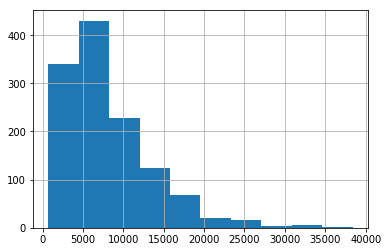

In [64]:
df['PTS'].hist()

Mit dem Parameter `bins` können wir das Histogramm feingliedriger gestalten:

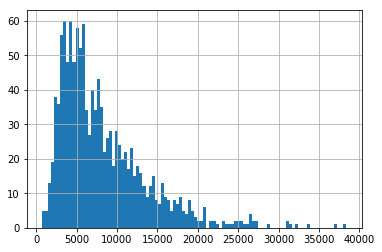

In [68]:
df['PTS'].hist(bins=100)

Man sieht: Die Verteilung der Punkte ist ziemlich linksschief. Die allermeisten Spieler haben zwischen 5000 und 15000 Punkten gesammelt. Über 25'000 sind nur die wenigsten gekommen.

**Quiz: ** Plotten Sie die eigene Alltime-Kennzahl in einem Histogramm. Ist die Verteilung ähnlich?

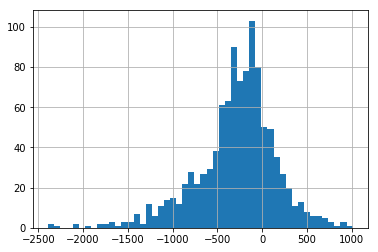

In [69]:
df['KEN'].hist(bins=50)

### Scatterplot

Scatterplots eignen sich für den Vergleich von zwei Spalten. Man erhält mit ihnen rasch eine Idee davon, ob die Werte in einer Spalte mit der anderen Spalte in Zusammenhang stehen.

**Beispiel:** Die Anzahl gesammelter Punkte und die Wurfquote

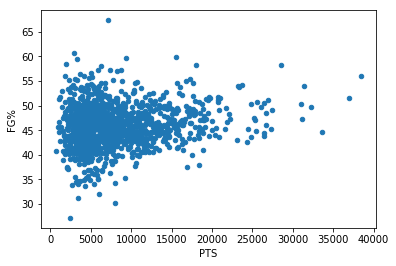

In [70]:
df.plot(kind='scatter', x='PTS', y='FG%')

Man sieht: Auch Spieler mit einer mittelguten Wurfquote haben es im Lauf ihrer Karriere zu grossen Punktesammlern gebracht.

**Quiz: ** Erforschen Sie den Zusammenhang zwischen den total gesammelten Punkten und Ihrer eigenen Kennzahl in einem Scatterplot!

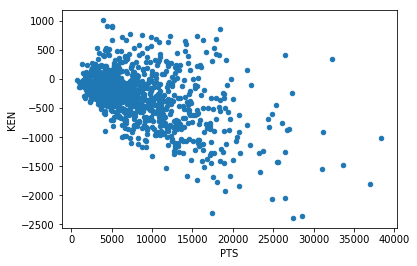

In [71]:
#Plot
df.plot(kind='scatter', x='PTS', y='KEN')

Wir können den Scatterplot auch noch schöner darstellen:

- mit Punkten in unterschiedlicher Grösse, entsprechend der Anzahl Punkte, die ein Spieler gesammelt hat

In [72]:
area = df['PTS'] / 500

- und grösser. Wir untersuchen: Gibt es einen Zusammenhang zwischen KEN und der Anzahl Spiele, die ein Spieler geamcht hat?

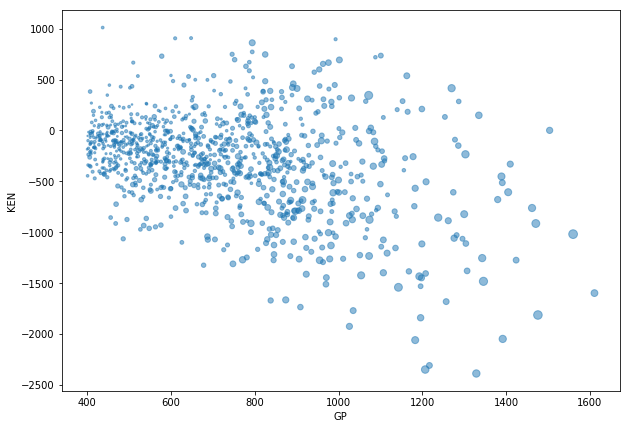

In [75]:
myfig = df.plot(kind='scatter', x='GP', y='KEN', s=area, alpha=0.5, figsize=(10,7))

**Quiz: ** Untersuchen Sie, wie die Wurfquote (FG%), die Freiwurfquote (FT%) und Ihre eigene Kennzahl zusammenhängen. Stellen Sie das Ergebnis in einem Scatterplot dar.

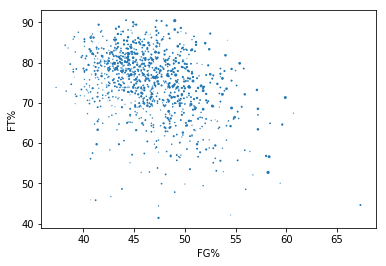

In [78]:
#Plot
df.plot(kind="scatter", x="FG%", y="FT%", s=abs(df["KEN"]/500))

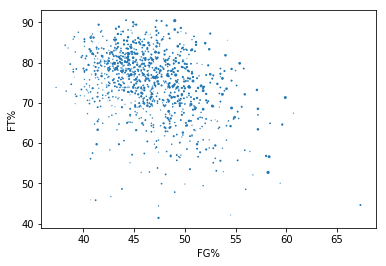

In [81]:
basketballer = df.plot(kind="scatter", x="FG%", y="FT%", s=abs(df["KEN"]/500))

from matplotlib import pyplot as plt
basketballer.get_figure().savefig('Basketballer.eps', format='eps')